In [7]:
import torch 
from torch import nn,optim 
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from statistics import mean
import matplotlib.pyplot as plt

In [8]:
t = transforms.ToTensor()
data = MNIST(root='./data', train=True, transform=t, download=True)
print(data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [9]:
class Encoder1(nn.Module):

    def __init__(self):
        super(Encoder1,self).__init__()
        self.encode1 = nn.Linear(784,196)
        self.bnorm1 = nn.BatchNorm1d(196)

        self.decode1 = nn.Linear(196,784)

    def forward(self,x):
        x = self.bnorm1(self.encode1(x))
        return self.decode1(x)

class Encoder2(nn.Module):

    def __init__(self):
        super(Encoder2,self).__init__()
        self.encode1 = nn.Linear(784,196)
        self.bnorm1 = nn.BatchNorm1d(196)

        self.encode2 = nn.Linear(196,49)
        self.bnorm2 = nn.BatchNorm1d(49)

        self.decode1 = nn.Linear(49,196)
        self.decode2 = nn.Linear(196,784)

    def forward(self,x):
        x = self.bnorm1(self.encode1(x))
        x = self.bnorm2(self.encode2(x))
        x = self.bnorm1(self.decode1(x))
        return self.decode2(x)

class Encoder3(nn.Module):

    def __init__(self):
        super(Encoder3,self).__init__()
        self.encode1 = nn.Linear(784,196)
        self.bnorm1 = nn.BatchNorm1d(196)

        self.encode2 = nn.Linear(196,49)
        self.bnorm2 = nn.BatchNorm1d(49)

        self.encode3 = nn.Linear(49,7)
        self.bnorm3 = nn.BatchNorm1d(7)

        self.decode1 = nn.Linear(7,49)
        self.bnorm4 = nn.BatchNorm1d(49)

        self.decode2 = nn.Linear(49,196)
        self.bnorm5 = nn.BatchNorm1d(196)

        self.decode3 = nn.Linear(196,784)

    def forward(self,x):
        x = self.bnorm1(self.encode1(x))
        x = self.bnorm2(self.encode2(x))
        x = self.bnorm3(self.encode3(x))

        x = self.bnorm4(self.decode1(x))
        x = self.bnorm5(self.decode2(x))
        return self.decode3(x)

In [10]:
def train_model(model):
    epochs = 15
    batch_size = 100
    lr = 0.015
    momentum = 0.8
    show_every = 50

    loader = DataLoader(dataset = data, batch_size = batch_size, shuffle = True)
    opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    loss_fn = nn.MSELoss()

    loss_list = []
    all_loss = []
    for epoch in range(epochs):
        temp_loss = []
        batch_counter = 0

        for x,y in loader :
            opt.zero_grad()
            x = torch.flatten(x, start_dim=1)
            yhat = model.forward(x)
            loss = loss_fn(yhat,x)

            temp_loss.append(loss.item())
            all_loss.append(loss.item())

            loss.backward()
            opt.step()

            if batch_counter % show_every == 0 : 
                print(f'{batch_counter} --> ', end='', flush=True)

            batch_counter += 1

        mean_loss = mean(temp_loss)
        loss_list.append(mean_loss)

        print()
        print(f'Epoch : {epoch} | Loss : {mean_loss}')
        print('-' * 50)

In [11]:
model1 = Encoder1()
model2 = Encoder2()
model3 = Encoder3()

In [12]:
train_model(model1)

0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 0 | Loss : 0.15215227155635755
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 1 | Loss : 0.07348345695063471
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 2 | Loss : 0.05486570904652278
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 3 | Loss : 0.042652339388926826
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 4 | Loss : 0.03593895729010304
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 50

In [13]:
train_model(model2)

0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 0 | Loss : 0.13369061561922232
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 1 | Loss : 0.07561318028718234
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 2 | Loss : 0.06004944423834483
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 3 | Loss : 0.04910535411288341
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 4 | Loss : 0.04320969886456927
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500

In [14]:
train_model(model3)

0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 0 | Loss : 0.12135126361002525
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 1 | Loss : 0.07993738695979119
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 2 | Loss : 0.06785854807123542
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 3 | Loss : 0.05818779095386466
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500 --> 550 --> 
Epoch : 4 | Loss : 0.05227930311113596
--------------------------------------------------
0 --> 50 --> 100 --> 150 --> 200 --> 250 --> 300 --> 350 --> 400 --> 450 --> 500

In [17]:
def sample(model, msg):  
    model.eval()  
    img_indexes = torch.randint(low = 0, high = len(data), size = (5,))
    fig,ax = plt.subplots(nrows = 2, ncols = 5, figsize = (20,8))
    trans = transforms.ToPILImage()
    fig.suptitle(f'Original images vs reconstructed images [{msg}]', size = 25)

    for i in range(len(img_indexes)):
        display_img = trans(data[img_indexes[i]][0])
        ax[0][i].imshow(display_img)
        ax[0][i].axis(False)

        model_input = data[img_indexes[i]][0]
        yhat = model.forward(torch.flatten(model_input, start_dim = 1))
        yhat = yhat.reshape((1,28,28))
        yhat = trans(yhat)
        ax[1][i].imshow(yhat)
        ax[1][i].axis(False)

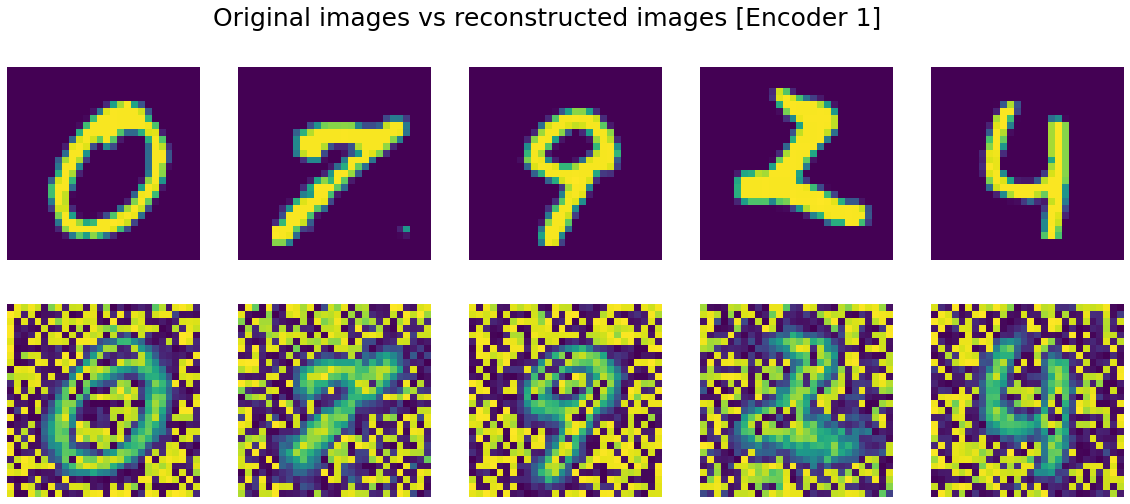

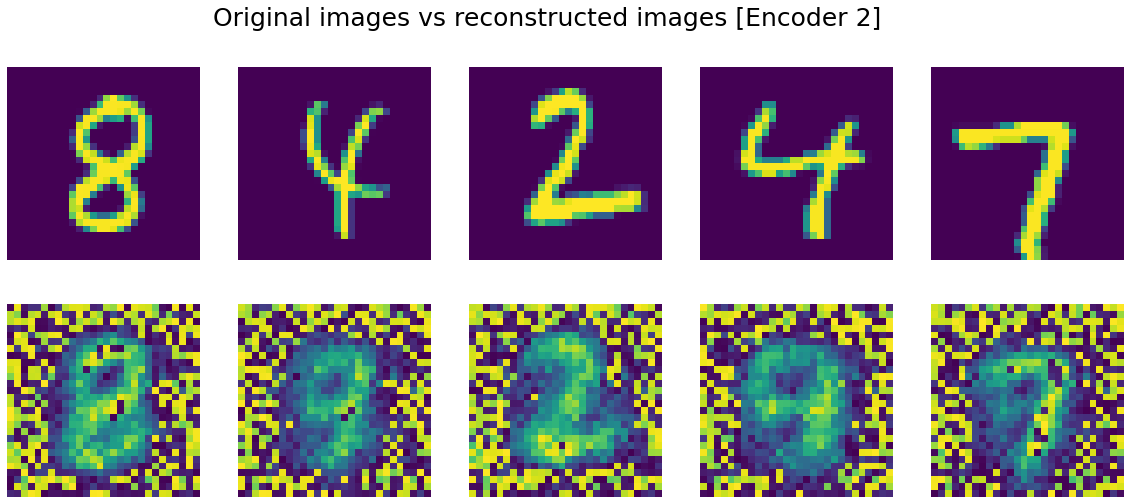

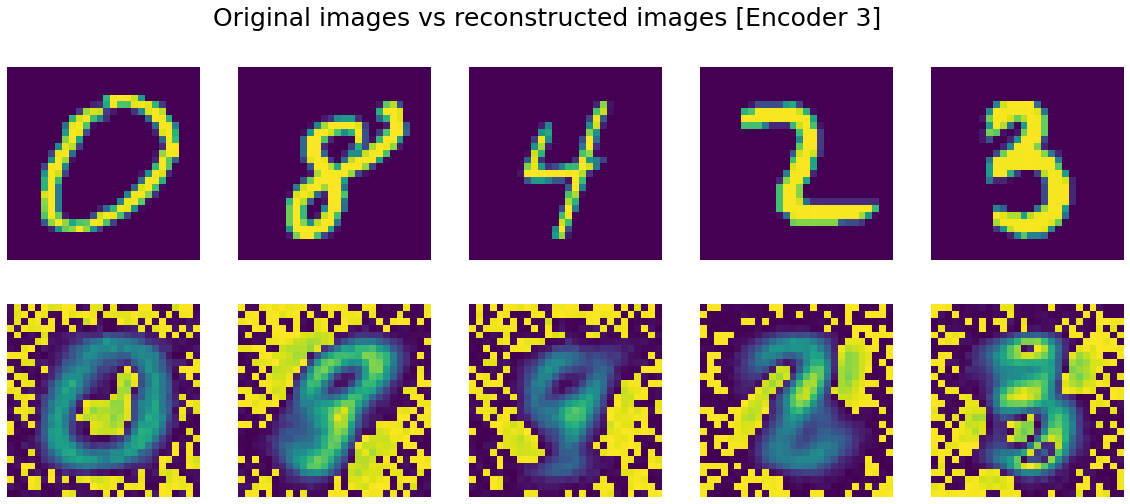

In [18]:
sample(model1, 'Encoder 1')
sample(model2, 'Encoder 2')
sample(model3, 'Encoder 3')